# Health Insurance Lead Prediction - JOB-A-THON

# Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
import warnings
warnings.filterwarnings('ignore')
import sklearn.base as skb
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.utils as sku
import sklearn.linear_model as sklm
import sklearn.neighbors as skn
import sklearn.ensemble as ske
import catboost as cb
import scipy.stats as sstats
import random
seed = 12
np.random.seed(seed)

from datetime import date

In [2]:
!pip install pandas-profiling
import pandas_profiling as pp

zsh:1: /usr/local/bin/pip: bad interpreter: /Library/Developer/CommandLineTools/usr/bin/python3: no such file or directory


In [3]:
# important funtions
def datasetShape(df):
    rows, cols = df.shape
    print("The dataframe has",rows,"rows and",cols,"columns.")
    
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [4]:
df = pd.read_csv('train_Df64byy.csv')
df.head()

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response
0   1        C3         3213            Rented          Individual         36         36        No               X1                     14+                 3.00               22             11628.00         0
1   2        C5         1117             Owned               Joint         75         22        No               X2                     NaN                  nan               22             30510.00         0
2   3        C5         3732             Owned          Individual         32         32        No              NaN                     1.0                 1.00               19              7450.00         1
3   4       C24         4378             Owned               Joint         52         48        No               X1                     14+                 3.00               19             17780.00         0
4   5        C8         2190            Rented          Individual         44         44        No               X2                     3.0                 1.00               16             10404.00         0

In [5]:
df_test = pd.read_csv('test_YCcRUnU.csv')
df_test.head()

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium
0  50883        C1          156             Owned          Individual         30         30        No              NaN                     6.0                 3.00                5             11934.00
1  50884        C4            7             Owned               Joint         69         68       Yes               X1                     3.0                 3.00               18             32204.80
2  50885        C1          564            Rented          Individual         28         28        No               X3                     2.0                 4.00               17              9240.00
3  50886        C3         1177            Rented          Individual         23         23        No               X3                     3.0                 3.00               18              9086.00
4  50887        C1          951             Owned          Individual         75         75        No               X3                     NaN                  nan                5             22534.00

In [6]:
# set target feature
targetFeature='Response'

In [7]:
# check dataset shape
datasetShape(df)

The dataframe has 50882 rows and 14 columns.


In [8]:
# remove ID from train data
df.drop(['ID'], inplace=True, axis=1)

In [9]:
# check for duplicates
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(50882, 13)
(50882, 13)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.4+ MB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [12]:
df.describe()

Region_Code  Upper_Age  Lower_Age  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response
count     50882.00   50882.00   50882.00             30631.00         50882.00             50882.00  50882.00
mean       1732.79      44.86      42.74                 2.44            15.12             14183.95      0.24
std        1424.08      17.31      17.32                 1.03             6.34              6590.07      0.43
min           1.00      18.00      16.00                 1.00             1.00              2280.00      0.00
25%         523.00      28.00      27.00                 1.00            12.00              9248.00      0.00
50%        1391.00      44.00      40.00                 3.00            17.00             13178.00      0.00
75%        2667.00      59.00      57.00                 3.00            20.00             18096.00      0.00
max        6194.00      75.00      75.00                 4.00            22.00             43350.40      1.00

# Step 2: EDA

In [13]:
cont_features, cat_features = divideFeatures(df)
cat_features.head()

City_Code Accomodation_Type Reco_Insurance_Type Is_Spouse Health Indicator Holding_Policy_Duration
0        C3            Rented          Individual        No               X1                     14+
1        C5             Owned               Joint        No               X2                     NaN
2        C5             Owned          Individual        No              NaN                     1.0
3       C24             Owned               Joint        No               X1                     14+
4        C8            Rented          Individual        No               X2                     3.0

### Univariate Analysis

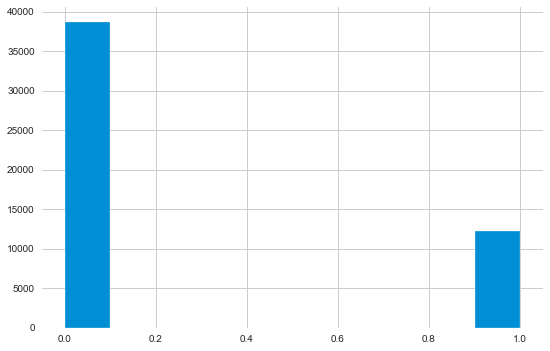

In [14]:
# check target feature distribution
df[targetFeature].hist()
plt.show()

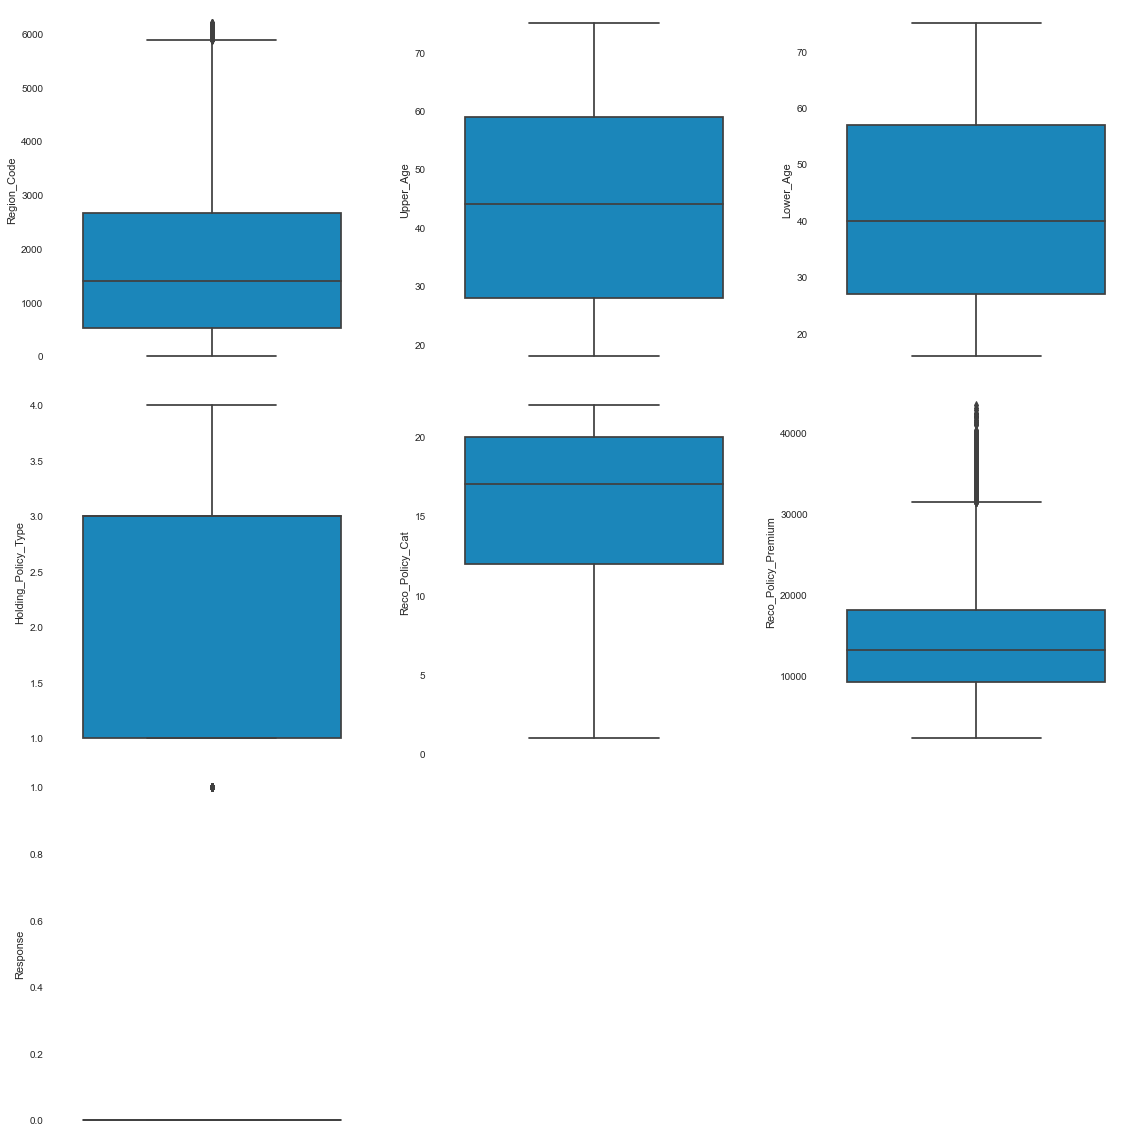

In [15]:
# boxplots of numerical features for outlier detection

fig = plt.figure(figsize=(16,16))
for i in range(len(cont_features.columns)):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y=cont_features.iloc[:,i])
plt.tight_layout()
plt.show()

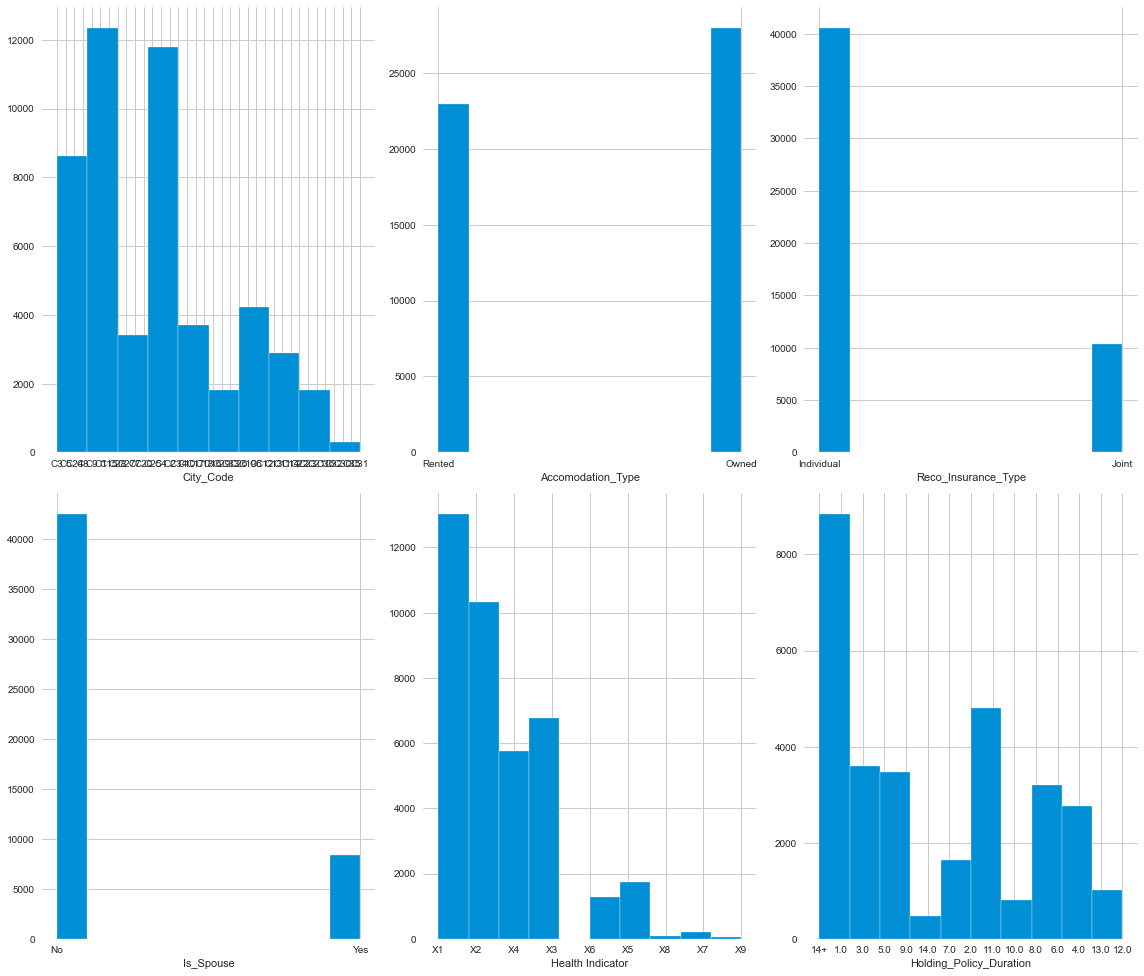

In [16]:
# distplots for categorical data

fig = plt.figure(figsize=(16,20))
for i in range(len(cat_features.columns)):
    fig.add_subplot(3, 3, i+1)
    cat_features.iloc[:,i].hist()
    plt.xlabel(cat_features.columns[i])
plt.tight_layout()
plt.show()

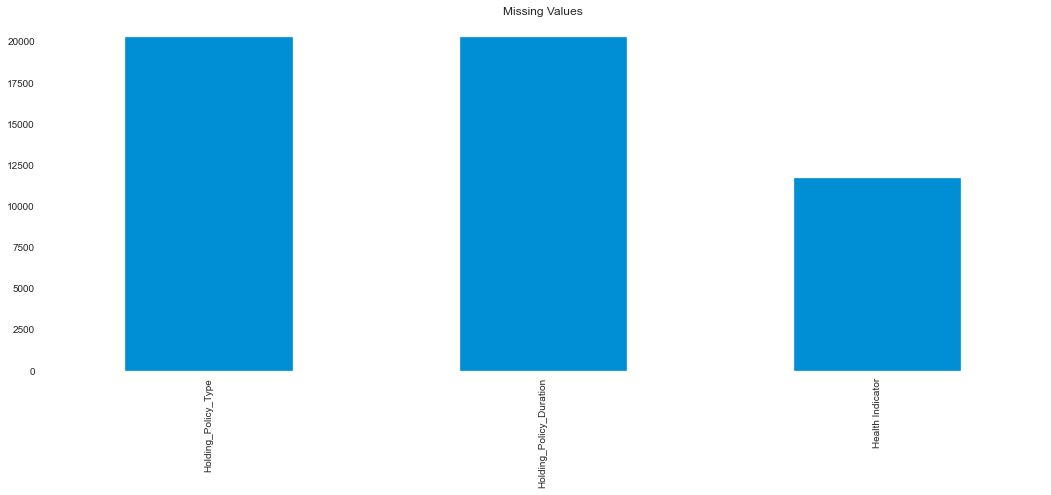

In [17]:
# plot missing values

def calc_missing(df):
    missing = df.isna().sum().sort_values(ascending=False)
    missing = missing[missing != 0]
    missing_perc = missing/df.shape[0]*100
    return missing, missing_perc

if df.isna().any().sum()>0:
    missing, missing_perc = calc_missing(df)
    missing.plot(kind='bar',figsize=(16,6))
    plt.title('Missing Values')
    plt.show()
else:
    print("No missing values")

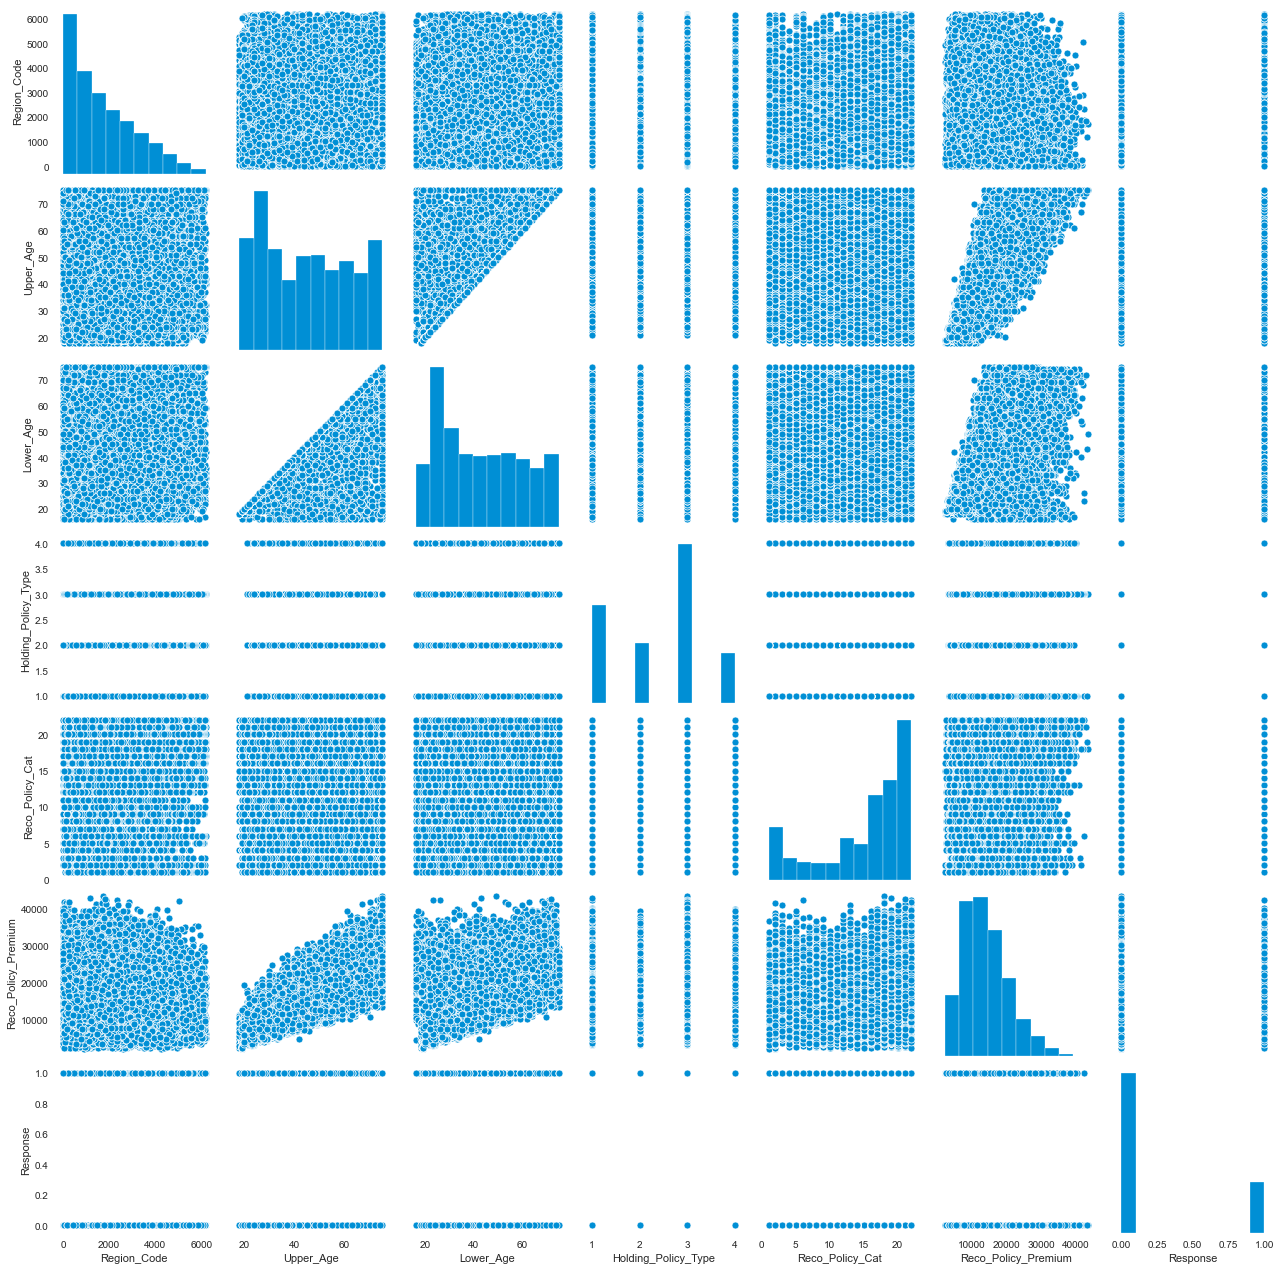

In [18]:
sns.pairplot(df)
plt.show()

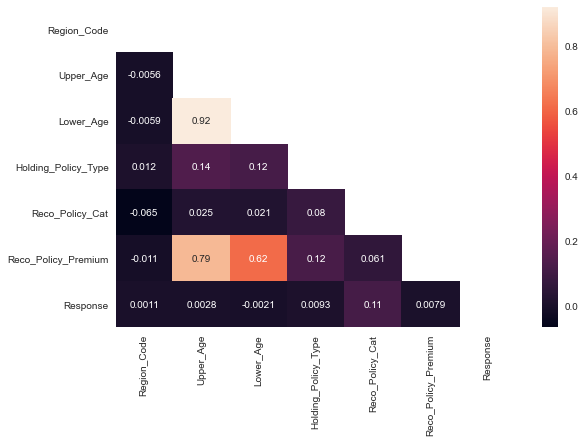

In [19]:
# correlation heatmap for all features
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

### Profiling for Whole Data

In [20]:
profile = pp.ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("profile.html")

In [21]:
profile.to_notebook_iframe()

# Step 3: Data Preparation

### Skewness

In [22]:
skewed_features = cont_features.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features

Response               1.22
Region_Code            0.80
Reco_Policy_Premium    0.78
Lower_Age              0.33
Upper_Age              0.22
Holding_Policy_Type   -0.20
Reco_Policy_Cat       -0.93
dtype: float64

### Handle Missing

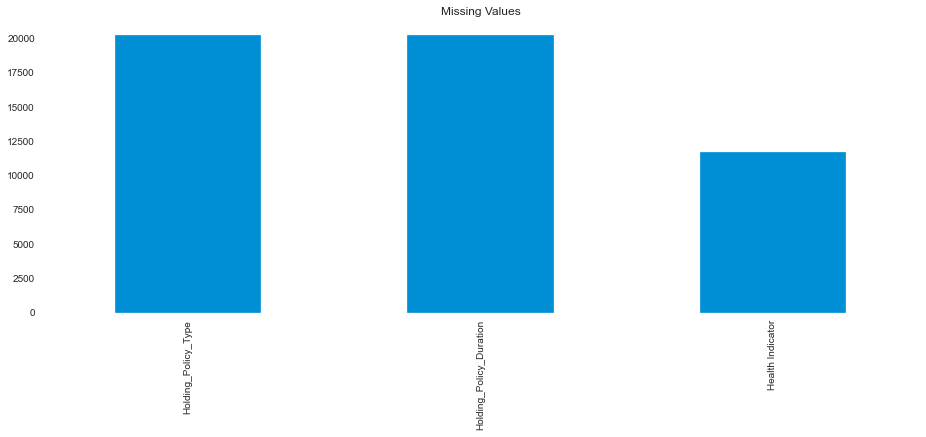

In [23]:
# plot missing values

def calc_missing(df):
    missing = df.isna().sum().sort_values(ascending=False)
    missing = missing[missing != 0]
    missing_perc = missing/df.shape[0]*100
    return missing, missing_perc

if df.isna().any().sum()>0:
    missing, missing_perc = calc_missing(df)
    missing.plot(kind='bar',figsize=(14,5))
    plt.title('Missing Values')
    plt.show()
else:
    print("No Missing Values")

In [24]:
# remove all columns having no values
df.dropna(axis=1, how="all", inplace=True)
df.dropna(axis=0, how="all", inplace=True)
datasetShape(df)

The dataframe has 50882 rows and 13 columns.


In [25]:
# def fillNan(df, col, value):
#     df[col].fillna(value, inplace=True)

In [26]:
# # setting missing values to most occurring values
# fillNan(df, 'Health Indicator', df['Health Indicator'].mode()[0])
# fillNan(df_test, 'Health Indicator', df['Health Indicator'].mode()[0])
# df['Health Indicator'].isna().any()

In [27]:
# # setting missing values to most occurring values
# # try changing with ML algo for missing
# fillNan(df, 'Holding_Policy_Duration', df['Holding_Policy_Duration'].mode()[0])
# fillNan(df_test, 'Holding_Policy_Duration', df['Holding_Policy_Duration'].mode()[0])
# df['Holding_Policy_Duration'].isna().any()

In [28]:
# # setting missing values to most occurring values
# # try changing with ML algo for missing
# fillNan(df, 'Holding_Policy_Type', df['Holding_Policy_Type'].mode()[0])
# fillNan(df_test, 'Holding_Policy_Type', df['Holding_Policy_Type'].mode()[0])
# df['Holding_Policy_Type'].isna().any()

### Health Indicator Missing Prediction

In [29]:
# # convert city code to int after removing C from it
# df['City_Code'] = pd.to_numeric(df['City_Code'].map(lambda x:x[1:]))
# df_test['City_Code'] = pd.to_numeric(df_test['City_Code'].map(lambda x:x[1:]))
# df['City_Code'].head()

In [30]:
cont_features, cat_features = divideFeatures(df)
cont_features.columns.tolist()

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Response']

In [31]:
# get all not null records for imputing
X_impute = df[df['Health Indicator'].isna()==False]
y_impute = X_impute.pop('Health Indicator')

# remove categorical cols and targetFeature from X_impute
X_impute = X_impute[cont_features.columns.tolist()]
X_impute.drop(['Holding_Policy_Type', targetFeature], inplace=True, axis=1)

# impute with CatBoostClassifier
imputer_model = cb.CatBoostClassifier(random_state=seed, verbose=0)
imputer_model.fit(X_impute, y_impute)

In [32]:
# predict values for train section
X_test_impute = df[df['Health Indicator'].isna()==True]
X_test_impute = X_test_impute[X_impute.columns.tolist()]
y_test_impute = imputer_model.predict(X_test_impute)

# setting value after prediction in df
for i,x in enumerate(X_test_impute.index):
    df.loc[x,'Health Indicator'] = y_test_impute[i]
    
# predict values for test section
X_test_impute = df_test[df_test['Health Indicator'].isna()==True]
X_test_impute = X_test_impute[X_impute.columns.tolist()]
y_test_impute = imputer_model.predict(X_test_impute)

# setting value after prediction in df
for i,x in enumerate(X_test_impute.index):
    df_test.loc[x,'Health Indicator'] = y_test_impute[i]

### Holding_Policy_Duration Missing Prediction

In [33]:
# # convert Health Indicator to int after removing X from it
# df['Health Indicator'] = pd.to_numeric(df['Health Indicator'].map(lambda x:x[1:]))
# df_test['Health Indicator'] = pd.to_numeric(df_test['Health Indicator'].map(lambda x:x[1:]))
# df['Health Indicator'].head()

In [34]:
cont_features, cat_features = divideFeatures(df)
cont_features.columns.tolist()

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Response']

In [35]:
# get all not null records for imputing
X_impute = df[df['Holding_Policy_Duration'].isna()==False]
y_impute = X_impute.pop('Holding_Policy_Duration')

# remove categorical cols and targetFeature from X_impute
X_impute = X_impute[cont_features.columns.tolist()]
X_impute.drop(['Holding_Policy_Type', targetFeature], inplace=True, axis=1)

# impute with RandomForestClassifier
imputer_model = cb.CatBoostClassifier(random_state=seed, verbose=0)
imputer_model.fit(X_impute, y_impute)

In [36]:
# predict values for train section
X_test_impute = df[df['Holding_Policy_Duration'].isna()==True]
X_test_impute = X_test_impute[X_impute.columns.tolist()]
y_test_impute = imputer_model.predict(X_test_impute)

# setting value after prediction in df
for i,x in enumerate(X_test_impute.index):
    df.loc[x,'Holding_Policy_Duration'] = y_test_impute[i]
    
# predict values for test section
X_test_impute = df_test[df_test['Holding_Policy_Duration'].isna()==True]
X_test_impute = X_test_impute[X_impute.columns.tolist()]
y_test_impute = imputer_model.predict(X_test_impute)

# setting value after prediction in df
for i,x in enumerate(X_test_impute.index):
    df_test.loc[x,'Holding_Policy_Duration'] = y_test_impute[i]

### Holding_Policy_Type Missing Prediction

In [37]:
# get all not null records for imputing
X_impute = df[df['Holding_Policy_Type'].isna()==False]
y_impute = X_impute.pop('Holding_Policy_Type')

# remove categorical cols and targetFeature from X_impute
cols_impute = cont_features.columns.tolist()
cols_impute.remove('Holding_Policy_Type')
X_impute = X_impute[cols_impute]
X_impute.drop([targetFeature], inplace=True, axis=1)

# impute with RandomForestClassifier
imputer_model = cb.CatBoostClassifier(random_state=seed, verbose=0)
imputer_model.fit(X_impute, y_impute)

In [38]:
# predict values for train section
X_test_impute = df[df['Holding_Policy_Type'].isna()==True]
X_test_impute = X_test_impute[X_impute.columns.tolist()]
y_test_impute = imputer_model.predict(X_test_impute)

# setting value after prediction in df
for i,x in enumerate(X_test_impute.index):
    df.loc[x,'Holding_Policy_Type'] = y_test_impute[i]
    
# predict values for test section
X_test_impute = df_test[df_test['Holding_Policy_Type'].isna()==True]
X_test_impute = X_test_impute[X_impute.columns.tolist()]
y_test_impute = imputer_model.predict(X_test_impute)

# setting value after prediction in df
for i,x in enumerate(X_test_impute.index):
    df_test.loc[x,'Holding_Policy_Type'] = y_test_impute[i]

In [39]:
print("Train Missing:",df.isna().any().sum())
print("Test Missing:",df_test.isna().any().sum())

Train Missing: 0
Test Missing: 0


## Derive Features

In [40]:
# feature for age difference between Upper_Age and Lower_Age
df['age_diff'] = abs(df['Upper_Age'] - df['Lower_Age'])
df_test['age_diff'] = abs(df_test['Upper_Age'] - df_test['Lower_Age'])
df_test.head()

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  age_diff
0  50883        C1          156             Owned          Individual         30         30        No               X2                     6.0                 3.00                5             11934.00         0
1  50884        C4            7             Owned               Joint         69         68       Yes               X1                     3.0                 3.00               18             32204.80         1
2  50885        C1          564            Rented          Individual         28         28        No               X3                     2.0                 4.00               17              9240.00         0
3  50886        C3         1177            Rented          Individual         23         23        No               X3                     3.0                 3.00               18              9086.00         0
4  50887        C1          951             Owned          Individual         75         75        No               X3                     14+                 3.00                5             22534.00         0

In [41]:
# drop Lower_Age column as it is highly correlated with Upper_age and we also have its info in age_diff
df.drop('Lower_Age', axis=1, inplace=True)
df_test.drop('Lower_Age', axis=1, inplace=True)
df_test.head()

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age Is_Spouse Health Indicator Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  age_diff
0  50883        C1          156             Owned          Individual         30        No               X2                     6.0                 3.00                5             11934.00         0
1  50884        C4            7             Owned               Joint         69       Yes               X1                     3.0                 3.00               18             32204.80         1
2  50885        C1          564            Rented          Individual         28        No               X3                     2.0                 4.00               17              9240.00         0
3  50886        C3         1177            Rented          Individual         23        No               X3                     3.0                 3.00               18              9086.00         0
4  50887        C1          951             Owned          Individual         75        No               X3                     14+                 3.00                5             22534.00         0

## Create Dummy Features

In [42]:
df['Holding_Policy_Duration'] = pd.to_numeric(df['Holding_Policy_Duration'].map(lambda x:'15' if x == '14+' else x))
df_test['Holding_Policy_Duration'] = pd.to_numeric(df_test['Holding_Policy_Duration'].map(lambda x:'15' if x == '14+' else x))
df_test['Holding_Policy_Duration'].head()

0    6.00
1    3.00
2    2.00
3    3.00
4   15.00
Name: Holding_Policy_Duration, dtype: float64

In [43]:
cont_features, cat_features = divideFeatures(df)
cat_features

City_Code Accomodation_Type Reco_Insurance_Type Is_Spouse Health Indicator
0            C3            Rented          Individual        No               X1
1            C5             Owned               Joint        No               X2
2            C5             Owned          Individual        No               X2
3           C24             Owned               Joint        No               X1
4            C8            Rented          Individual        No               X2
...         ...               ...                 ...       ...              ...
50877        C4            Rented          Individual        No               X3
50878        C5            Rented          Individual        No               X3
50879        C1            Rented          Individual        No               X2
50880        C1             Owned               Joint        No               X2
50881        C3            Rented          Individual        No               X3

[50882 rows x 5 columns]

In [44]:
# label encoding on categorical features
def mapFeature(data, f, data_test=None):
    feat = data[f].unique()
    feat_idx = [x for x in range(len(feat))]

    data[f].replace(feat, feat_idx, inplace=True)
    if data_test is not None:
        data_test[f].replace(feat, feat_idx, inplace=True)

In [45]:
for col in cat_features.columns:
    mapFeature(df, col, df_test)
df_test.head()

ID  City_Code  Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  Is_Spouse  Health Indicator  Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  age_diff
0  50883          5          156                  1                    0         30          0                 1                     6.00                 3.00                5             11934.00         0
1  50884         12            7                  1                    1         69          1                 0                     3.00                 3.00               18             32204.80         1
2  50885          5          564                  0                    0         28          0                 3                     2.00                 4.00               17              9240.00         0
3  50886          0         1177                  0                    0         23          0                 3                     3.00                 3.00               18              9086.00         0
4  50887          5          951                  1                    0         75          0                 3                    15.00                 3.00                5             22534.00         0

### One-Hot Encoding

In [46]:
# extract numerical and categorical for dummy and scaling later
custom_feat = ['City_Code', 'Health Indicator']
# custom_feat = ['Health Indicator']
for feat in cat_features.columns:
    if len(df[feat].unique()) > 2 and feat in custom_feat:
        dummyVars = pd.get_dummies(df[feat], drop_first=True, prefix=feat+"_")
        df = pd.concat([df, dummyVars], axis=1)
        df.drop(feat, axis=1, inplace=True)
datasetShape(df)

df.head()

The dataframe has 50882 rows and 54 columns.


Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  age_diff  City_Code__1  City_Code__2  City_Code__3  City_Code__4  City_Code__5  City_Code__6  City_Code__7  City_Code__8  City_Code__9  City_Code__10  City_Code__11  City_Code__12  City_Code__13  City_Code__14  City_Code__15  \
0         3213                  0                    0         36          0                    15.00                 3.00               22             11628.00         0         0             0             0             0             0             0             0             0             0             0              0              0              0              0              0              0   
1         1117                  1                    1         75          0                    15.00                 3.00               22             30510.00         0        53             1             0             0             0             0             0             0             0             0              0              0              0              0              0              0   
2         3732                  1                    0         32          0                     1.00                 1.00               19              7450.00         1         0             1             0             0             0             0             0             0             0             0              0              0              0              0              0              0   
3         4378                  1                    1         52          0                    15.00                 3.00               19             17780.00         0         4             0             1             0             0             0             0             0             0             0              0              0              0              0              0              0   
4         2190                  0                    0         44          0                     3.00                 1.00               16             10404.00         0         0             0             0             1             0             0             0             0             0             0              0              0              0              0              0              0   

   City_Code__16  City_Code__17  City_Code__18  City_Code__19  City_Code__20  City_Code__21  City_Code__22  City_Code__23  City_Code__24  City_Code__25  City_Code__26  City_Code__27  City_Code__28  City_Code__29  City_Code__30  City_Code__31  City_Code__32  City_Code__33  City_Code__34  City_Code__35  Health Indicator__1  Health Indicator__2  Health Indicator__3  Health Indicator__4  \
0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0                    0                    0                    0                    0   
1              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0                    1                    0                    0                    0   
2              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0                    1                    0                    0                    0   
3              0              0              0

In [47]:
# extract numerical and categorical for dummy and scaling later
custom_feat = ['City_Code', 'Health Indicator']
# custom_feat = ['Health Indicator']
for feat in cat_features.columns:
    if len(df_test[feat].unique()) > 2 and feat in custom_feat:
        dummyVars = pd.get_dummies(df_test[feat], drop_first=True, prefix=feat+"_")
        df_test = pd.concat([df_test, dummyVars], axis=1)
        df_test.drop(feat, axis=1, inplace=True)
datasetShape(df_test)

df_test.head()

The dataframe has 21805 rows and 54 columns.


ID  Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  age_diff  City_Code__1  City_Code__2  City_Code__3  City_Code__4  City_Code__5  City_Code__6  City_Code__7  City_Code__8  City_Code__9  City_Code__10  City_Code__11  City_Code__12  City_Code__13  City_Code__14  City_Code__15  \
0  50883          156                  1                    0         30          0                     6.00                 3.00                5             11934.00         0             0             0             0             0             1             0             0             0             0              0              0              0              0              0              0   
1  50884            7                  1                    1         69          1                     3.00                 3.00               18             32204.80         1             0             0             0             0             0             0             0             0             0              0              0              1              0              0              0   
2  50885          564                  0                    0         28          0                     2.00                 4.00               17              9240.00         0             0             0             0             0             1             0             0             0             0              0              0              0              0              0              0   
3  50886         1177                  0                    0         23          0                     3.00                 3.00               18              9086.00         0             0             0             0             0             0             0             0             0             0              0              0              0              0              0              0   
4  50887          951                  1                    0         75          0                    15.00                 3.00                5             22534.00         0             0             0             0             0             1             0             0             0             0              0              0              0              0              0              0   

   City_Code__16  City_Code__17  City_Code__18  City_Code__19  City_Code__20  City_Code__21  City_Code__22  City_Code__23  City_Code__24  City_Code__25  City_Code__26  City_Code__27  City_Code__28  City_Code__29  City_Code__30  City_Code__31  City_Code__32  City_Code__33  City_Code__34  City_Code__35  Health Indicator__1  Health Indicator__2  Health Indicator__3  Health Indicator__4  \
0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0                    1                    0                    0                    0   
1              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0                    0                    0                    0                    0   
2              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0              0                    0                    0                    1                    0   
3              0              0              0              0      

In [48]:
# # dropping holding policy features
# df.drop(['Holding_Policy_Duration', 'Holding_Policy_Type'], inplace=True, axis=1)
# df_test.drop(['Holding_Policy_Duration', 'Holding_Policy_Type'], inplace=True, axis=1)

# Step 4: Data Modelling

### Split Train-Test Data

In [49]:
# helper functions

def log1p(vec):
    return np.log1p(abs(vec))

def expm1(x):
    return np.expm1(x)

def clipExp(vec):
    return np.clip(expm1(vec), 0, None)

def printScore(y_train, y_train_pred):
    print(skm.roc_auc_score(y_train, y_train_pred))

In [50]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

df_y = df_shuffle.pop(targetFeature)
df_X = df_shuffle

# split into train dev and test
X_train, X_test, y_train, y_test = skms.train_test_split(df_X, df_y, train_size=0.8, random_state=seed)
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 40705 records out of 50882 which is 80%
Test set has 10177 records out of 50882 which is 20%


### Feature Scaling

In [51]:
# scaler = skp.RobustScaler()
# scaler = skp.MinMaxScaler()
scaler = skp.StandardScaler()

# apply scaling to all numerical variables except dummy variables as they are already between 0 and 1
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# scale test data with transform()
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# view sample data
X_train.describe()

Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  age_diff  City_Code__1  City_Code__2  City_Code__3  City_Code__4  City_Code__5  City_Code__6  City_Code__7  City_Code__8  City_Code__9  City_Code__10  City_Code__11  City_Code__12  City_Code__13  City_Code__14  City_Code__15  \
count     40705.00           40705.00             40705.00   40705.00   40705.00                 40705.00             40705.00         40705.00             40705.00  40705.00      40705.00      40705.00      40705.00      40705.00      40705.00      40705.00      40705.00      40705.00      40705.00       40705.00       40705.00       40705.00       40705.00       40705.00       40705.00   
mean          0.00              -0.00                -0.00       0.00      -0.00                    -0.00                -0.00            -0.00                -0.00     -0.00          0.00          0.00          0.00          0.00         -0.00          0.00          0.00         -0.00          0.00           0.00           0.00           0.00          -0.00           0.00          -0.00   
std           1.00               1.00                 1.00       1.00       1.00                     1.00                 1.00             1.00                 1.00      1.00          1.00          1.00          1.00          1.00          1.00          1.00          1.00          1.00          1.00           1.00           1.00           1.00           1.00           1.00           1.00   
min          -1.21              -1.10                -0.51      -1.55      -0.45                    -0.92                -1.38            -2.23                -1.80     -0.31         -0.16         -0.10         -0.19         -0.21         -0.46         -0.15         -0.08         -0.08         -0.20          -0.14          -0.09          -0.28          -0.42          -0.05          -0.18   
25%          -0.85              -1.10                -0.51      -0.97      -0.45                    -0.73                -1.38            -0.49                -0.75     -0.31         -0.16         -0.10         -0.19         -0.21         -0.46         -0.15         -0.08         -0.08         -0.20          -0.14          -0.09          -0.28          -0.42          -0.05          -0.18   
50%          -0.24               0.91                -0.51      -0.05      -0.45                    -0.54                 0.60             0.30                -0.16     -0.31         -0.16         -0.10         -0.19         -0.21         -0.46         -0.15         -0.08         -0.08         -0.20          -0.14          -0.09          -0.28          -0.42          -0.05          -0.18   
75%           0.66               0.91                -0.51       0.82      -0.45                     0.78                 0.60             0.77                 0.59     -0.31         -0.16         -0.10         -0.19         -0.21         -0.46         -0.15         -0.08         -0.08         -0.20          -0.14          -0.09          -0.28          -0.42          -0.05          -0.18   
max           3.13               0.91                 1.98       1.75       2.24                     1.73                 1.60             1.08                 4.42      8.32          6.11          9.61          5.23          4.77          2.16          6.46         13.27         13.21          5.05           7.33          11.62           3.58           2.36          19.85           5.53   

       City_Code__16  City_Code__17  City_Code__18  City_Code__19  City_Code__20  City_Code__21  City_Code__22  City_Code__23  City_Code__24  City_Code__25  City_Code__26  City_Code__27  City_Code__28  City_Code__29  City_Code__30  City_Code__31  City_Code__32  City_Code__33  City_Code__34  City_Code__35  Health Indicator__1  Health Indicator__2  Health Indicator__3  Health Indicator__4  \
count       40705.00       40705.00       40705.00       40705.00  

## Model Building

In [52]:
# X_train_small = X_train.sample(frac=0.3)
# y_train_small = y_train.iloc[X_train_small.index.tolist()]
# X_train_small.shape

In [53]:
class_weights = sku.class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6572106690777577, 1: 2.090222861250899}

In [54]:
sample_weights = sku.class_weight.compute_sample_weight('balanced', y_train)
sample_weights

array([0.65721067, 0.65721067, 0.65721067, ..., 0.65721067, 0.65721067,
       2.09022286])

### KNN

In [55]:
knn = skn.KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
knn.fit(X_train, y_train)

# predict
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print(skm.accuracy_score(y_train, y_train_pred))
print(skm.accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.7885272079597101
0.7155350299695391
0.6122253629404515
0.5152731225678279


### Logistic Regression

In [56]:
log_model = sklm.LogisticRegression()
log_model.fit(X_train, y_train, sample_weight=sample_weights)

# predict
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)
print(skm.accuracy_score(y_train, y_train_pred))
print(skm.accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.49369856283011915
0.4946447872654024
0.5495987857691649
0.5470163954394343


In [57]:
enet_model = sklm.ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                    alphas = [1, 0.1, 0.01, 0.001, 0.0005], cv=10)
enet_model.fit(X_train, y_train)

# predict
y_train_pred = enet_model.predict(X_train)
y_test_pred = enet_model.predict(X_test)
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.5634731278132847
0.5654103900085894


In [58]:
ridge_model = sklm.RidgeCV(scoring = "neg_mean_squared_error", 
                    alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10], cv=5
                   )
ridge_model.fit(X_train, y_train)

# predict
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.5733674348886433
0.5685613721178826


### CatBoost

In [59]:
import catboost as cb

cat_model = cb.CatBoostClassifier(loss_function='Logloss', verbose=0, eval_metric='AUC', class_weights=class_weights,
                           use_best_model=True, iterations=500)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))
print(cat_model.best_score_)

y_train_pred = cat_model.predict(X_train)
y_test_pred = cat_model.predict(X_test)
print(skm.accuracy_score(y_train, y_train_pred))
print(skm.accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

{'learn': {'Logloss': 0.5540231019773159}, 'validation': {'Logloss': 0.6362261325690545, 'AUC': 0.6759351196738973}}
0.6617123203537649
0.6047951262651076
0.7034971722857258
0.6251188916120116


### Gradient Boosting

In [60]:
# # Grid used
# param_test1 = {
#     'n_estimators': [10, 50, 100, 500],
#     'max_depth': np.arange(2, 12, 2)
# }
# gb_cv1 = skms.GridSearchCV(estimator = ske.GradientBoostingClassifier(loss='deviance', random_state=seed), 
#                              param_grid = param_test1, n_jobs=-1, 
#                              cv=5, verbose=1)
# # gb_cv1.fit(X_train_small, y_train_small)
# gb_cv1.fit(X_train, y_train, sample_weight=sample_weights)
# print(gb_cv1.best_params_, gb_cv1.best_score_)
# # n_estimators = 1000
# # max_depth = 10

In [61]:
# # Grid used
# param_test2 = {
#     'min_samples_split': np.arange(2, 12, 3),
#     'min_samples_leaf': np.arange(1, 10, 3)
# }
# gb_cv2 = skms.GridSearchCV(estimator = ske.GradientBoostingClassifier(loss='deviance', random_state=seed,
#                                                                  n_estimators=50,
#                                                                  max_depth=7), 
#                              param_grid = param_test2, n_jobs=-1, 
#                              cv=5, verbose=1)
# gb_cv2.fit(X_train, y_train)
# print(gb_cv2.best_params_, gb_cv2.best_score_)
# print(gb_cv2.best_estimator_)
# # min_samples_split = 8
# # min_samples_leaf = 1

In [62]:
gb_model = ske.GradientBoostingClassifier(loss='deviance', random_state=seed, verbose=0,
                                    n_estimators=50, max_depth=7,
                                    min_samples_leaf=1, min_samples_split=8)
gb_model.fit(X_train, y_train, sample_weight=sample_weights)

# predict
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)
print(skm.accuracy_score(y_train, y_train_pred))
print(skm.accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.6096794005650411
0.5667682028102584
0.677468100463529
0.6199243335874448


### Extra Trees

In [63]:
# # Grid used
# param_test1 = {
#     'n_estimators': [10, 50, 100, 500, 1000],
#     'max_depth': np.arange(2, 12, 2)
# }
# extra_cv1 = skms.GridSearchCV(estimator = ske.ExtraTreesClassifier(criterion='gini', random_state=seed), 
#                              param_grid = param_test1, scoring='neg_mean_squared_error', n_jobs=-1, 
#                              cv=5, verbose=1)
# # extra_cv1.fit(X_train_small, y_train_small)
# extra_cv1.fit(X_train, y_train)
# print(extra_cv1.best_params_, extra_cv1.best_score_)
# # n_estimators = 200
# # max_depth = 10

In [64]:
# # Grid used
# param_test2 = {
#     'min_samples_split': np.arange(5, 18, 3),
#     'min_samples_leaf': np.arange(1, 10, 2)
# }
# extra_cv2 = skms.GridSearchCV(estimator = ske.ExtraTreesClassifier(criterion='gini', random_state=seed,
#                                                                  n_estimators=200,
#                                                                  max_depth=10), 
#                               param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=-1, 
#                               cv=5, verbose=1)
# extra_cv2.fit(X_train, y_train)
# print(extra_cv2.best_params_, extra_cv2.best_score_)
# print(extra_cv2.best_estimator_)
# # min_samples_split = 5
# # min_samples_leaf = 1

In [65]:
extra_model = ske.ExtraTreesClassifier(criterion='gini', random_state=1, verbose=0, n_jobs=-1,
                              n_estimators=200,max_depth=10,
                              min_samples_split = 5, min_samples_leaf = 1)
extra_model.fit(X_train, y_train, sample_weight=sample_weights)

# predict
y_train_pred = extra_model.predict(X_train)
y_test_pred = extra_model.predict(X_test)
print(skm.accuracy_score(y_train, y_train_pred))
print(skm.accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.5126151578430168
0.4763682814188857
0.6221608061455707
0.5716247540264067


### AdaBoost

In [66]:
ada_model = ske.AdaBoostClassifier(random_state=1)
ada_model.fit(X_train, y_train, sample_weight=sample_weights)

# predict
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)
print(skm.accuracy_score(y_train, y_train_pred))
print(skm.accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.5352905048519838
0.5362090989486096
0.5811932370159796
0.5829831950420964


### RandomForest

In [67]:
rf_model = ske.RandomForestClassifier(verbose=0, random_state=1, n_jobs=-1, class_weight='balanced_subsample',
                                 n_estimators=200,max_depth=10, 
                                 min_samples_split = 7, min_samples_leaf = 1
                                )
rf_model.fit(X_train, y_train)

# predict
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print(skm.accuracy_score(y_train, y_train_pred))
print(skm.accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.5421446996683454
0.48658740296747566
0.6518125386637834
0.5811210673101357


### XGBoost

In [68]:
import xgboost as xg

In [69]:
# # Grid used
# param_test1 = {
#     'max_depth': np.arange(5, 12, 2),
#     'learning_rate': np.arange(0.04, 0.07, 0.01)
# }
# xgb_cv1 = skms.GridSearchCV(estimator = xg.XGBClassifier(n_estimators=100, objective='reg:squarederror', nthread=4, seed=seed), 
#                              param_grid = param_test1, scoring='neg_mean_squared_error', n_jobs=4, 
#                              iid=False, cv=5, verbose=1)
# xgb_cv1.fit(X_train_small, y_train_small)
# print(xgb_cv1.best_params_, xgb_cv1.best_score_)
# # max_depth = 10
# # learning_rate = 0.04

In [70]:
# param_test2 = {
#  'subsample': np.arange(0.5, 1, 0.1),
#  'min_child_weight': range(1, 6, 1)
# }
# xgb_cv2 = skms.GridSearchCV(estimator = xg.XGBClassifier(n_estimators=500, max_depth = 10, 
#                                                      objective= 'reg:squarederror', nthread=4, seed=seed), 
#                             param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=4,
#                             cv=5, verbose=1)
# xgb_cv2.fit(X_train_small, y_train_small)
# print(xgb_cv2.best_params_, xgb_cv2.best_score_)
# print(xgb_cv2.best_estimator_)
# # subsample = 0.5
# # min_child_weight = 2

In [71]:
# working without scaling
xgb_model = xg.XGBClassifier(objective ='binary:logistic', random_state=seed, verbose=0,
                      n_estimators=500, max_depth = 10)
xgb_model.fit(X_train, y_train)

# predict
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
print(skm.accuracy_score(y_train, y_train_pred))
print(skm.accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

[19:11:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9985996806289154
0.7366610985555665
0.9971082252573608
0.5543642593280957


### LightGBM

In [72]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective='binary', class_weight=class_weights, random_state=1, n_jobs=-1,
                         n_estimators=50)
lgb_model.fit(X_train, y_train)

# predict
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)
print(skm.accuracy_score(y_train, y_train_pred))
print(skm.accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.5750399213855791
0.5561560381251842
0.6536817253997123
0.6288511011846634


## Deep Learning Model

In [74]:
import tensorflow as tf
import tensorflow_addons as tfa
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)

ModuleNotFoundError: No module named 'tensorflow_addons'

In [ ]:
THRESHOLD = .999
bestModelPath = './best_model.hdf5'

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > THRESHOLD):
            print("\n\nStopping training as we have reached our goal.")   
            self.model.stop_training = True

mycb = myCallback()
checkpoint = k.callbacks.ModelCheckpoint(filepath=bestModelPath, monitor='val_loss', verbose=1, save_best_only=True)

callbacks_list = [mycb,
                  checkpoint
                 ]
            
def plotHistory(history):
    print("Min. Validation ACC Score",min(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
epochs = 40

model_1 = k.models.Sequential([
    k.layers.Dense(2048, activation='relu', input_shape=(X_train.shape[1],)),
#     k.layers.Dropout(0.3),
    
    k.layers.Dense(1024, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(1, activation='sigmoid'),
])
print(model_1.summary())

model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[
#                   tfa.metrics.F1Score(num_classes=1),
                  'accuracy'
              ]
)
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                      batch_size=2048, 
#                       class_weight=class_weights,
                      callbacks=[callbacks_list]
                     )


In [ ]:
plotHistory(history)

In [ ]:
# y_train_pred = model_1.predict(X_train)
# y_test_pred = model_1.predict(X_test)
# print(skm.accuracy_score(y_train, y_train_pred))
# print(skm.accuracy_score(y_test, y_test_pred))
# printScore(y_train, y_train_pred)
# printScore(y_test, y_test_pred)

# Test Evaluation & Submission

In [ ]:
# Generate Ensembles

# def rmse_cv(model):
#     '''
#     Use this function to get quickly the rmse score over a cv
#     '''
#     rmse = np.sqrt(-skms.cross_val_score(model, X_train, y_train, 
#                                          scoring="neg_mean_squared_error", cv = 5, n_jobs=-1))
#     return rmse

# class MixModel(skb.BaseEstimator, skb.RegressorMixin, skb.TransformerMixin):
#     '''
#     Here we will get a set of models as parameter already trained and 
#     will calculate the mean of the predictions for using each model predictions
#     '''
#     def __init__(self, algs):
#         self.algs = algs

#     # Define clones of parameters models
#     def fit(self, X, y):
#         self.algs_ = [skb.clone(x) for x in self.algs]
        
#         # Train cloned base models
#         for alg in self.algs_:
#             alg.fit(X, y)

#         return self
    
#     # Average predictions of all cloned models
#     def predict(self, X):
#         predictions = np.column_stack([
#             stacked_model.predict(X) for stacked_model in self.algs_
#         ])
#         return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)

In [ ]:
# mixed_model = MixModel(algs = [
# #     ridge_model, 
# #     enet_model, 
# #     extra_model, 
# #     cat_model,
# #     rf_model,
# #     xgb_model,
# #     gb_model,
# #     lgb_model,
#     ada_model
# ])
# # score = rmse_cv(mixed_model)
# # print("\nAveraged base algs score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

# mixed_model.fit(X_train, y_train)

# # predict
# y_train_pred = mixed_model.predict(X_train)
# y_test_pred = mixed_model.predict(X_test)
# printScore(y_train, y_train_pred)
# printScore(y_test, y_test_pred)

In [ ]:
def getTestResults(m=None):
    df_final = df.sample(frac=1, random_state=1).reset_index(drop=True)
    test_cols = [x for x in df_final.columns if targetFeature not in x]
    df_final_test = df_test[test_cols]
    df_y = df_final.pop(targetFeature)
    df_X = df_final

#     scaler = skp.RobustScaler()
#     scaler = skp.MinMaxScaler()
    scaler = skp.StandardScaler()

    df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)
    df_final_test = pd.DataFrame(scaler.transform(df_final_test), columns=df_X.columns)

    sample_weights = sku.class_weight.compute_sample_weight('balanced', df_y)
    
    if m is None:

#         lmr = sklm.LogisticRegression()
#         lmr.fit(df_X, df_y)

        lmr = cb.CatBoostClassifier(loss_function='Logloss', verbose=0, eval_metric='AUC', class_weights=class_weights)
        lmr.fit(df_X, df_y)

#         lmr = ske.ExtraTreesClassifier(criterion='gini', random_state=1, verbose=0, n_jobs=-1,
#                               n_estimators=200,max_depth=10, min_samples_split = 5, min_samples_leaf = 1)
#         lmr.fit(df_X, df_y, sample_weight=sample_weights)

#         lmr = ske.AdaBoostClassifier(random_state=seed)
#         lmr.fit(df_X, df_y, sample_weight=sample_weights)

#         lmr = ske.GradientBoostingClassifier(loss='deviance', random_state=seed, verbose=0,
#                                     n_estimators=50, max_depth=7,min_samples_leaf=1, min_samples_split=8)
#         lmr.fit(df_X, df_y, sample_weight=sample_weights)

#         lmr = ske.RandomForestClassifier(verbose=0, random_state=1, n_jobs=-1, class_weight='balanced_subsample',
#                                  n_estimators=200,max_depth=10, min_samples_split = 7, min_samples_leaf = 1)
#         lmr.fit(df_X, df_y)

#         lmr = xg.XGBClassifier(objective ='binary:logistic', random_state=seed, verbose=0,
#                       n_estimators=500, max_depth = 10)
#         lmr.fit(df_X, df_y)

#         lmr = lgb.LGBMClassifier(objective='binary', class_weight=class_weights, random_state=1, n_jobs=-1, n_estimators=50)
#         lmr.fit(df_X, df_y)

    else:
        lmr = m

    # predict
    y_train_pred = lmr.predict(df_X)
    y_test_pred = lmr.predict(df_final_test)
    if m is not None:
        y_train_pred = [round(y[0]) for y in y_train_pred]
        y_test_pred = [round(y[0]) for y in y_test_pred]
    print(skm.accuracy_score(df_y, y_train_pred))
    printScore(df_y, y_train_pred)
    return y_test_pred

# ML models
results = getTestResults()

# Neural Network model
# results = getTestResults(k.models.load_model(bestModelPath))

In [ ]:
submission = pd.DataFrame({
    'ID': df_test['ID'],
    targetFeature: results,
})
print(submission.Response.value_counts())
submission.head()

In [ ]:
submission.to_csv('./submission_Cat-robust.csv', index=False)